# Pymaceuticals Inc.
---

### Analysis

One observation we can make from the data is that there is a strong positive correlation (0.84) between the weight of mice treated with Capomulin and their average tumor volume. It should be noted that since we only graphed the data for Capomulin, we cannot determine if Capomulin has any distinct effect on this correlation compared to the other drugs. Another observation is that mice treated with Capomulin had lower median final tumor volumes than those treated with other drugs, particularly Infubinol and Ceftamin. Lastly, mice treated with Capomulin had the most observed timepoints compared to all other drugs tested, meaning those mice tended to live longer than their competitors. These latter two observations indicate that Capomulin has better observed performance than its competitors.
 

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, how="left")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [29]:
# Checking the number of mice.
print(len(pd.unique(combined_df["Mouse ID"])))

249


In [30]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# duplicated() function taken from Pandas documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
duplicate_mice = list(combined_df[combined_df.duplicated()]["Mouse ID"])
duplicate_mice

['g989']

In [31]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = combined_df.loc[combined_df["Mouse ID"] == duplicate_mice[0]]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [32]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df["Mouse ID"] != duplicate_mice[0]]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [33]:
# Checking the number of mice in the clean DataFrame.
print(len(pd.unique(clean_df["Mouse ID"])))

248


## Summary Statistics

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
volume_mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
volume_median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
volume_variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
volume_stdev = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
volume_sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_table = pd.DataFrame({"Mean Tumor Volume": volume_mean, "Median Tumor Volume": volume_median, "Tumor Volume Variance": volume_variance,
                              "Tumor Volume Std. Dev.": volume_stdev, "Tumor Volume Std. Err.": volume_sem})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [35]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

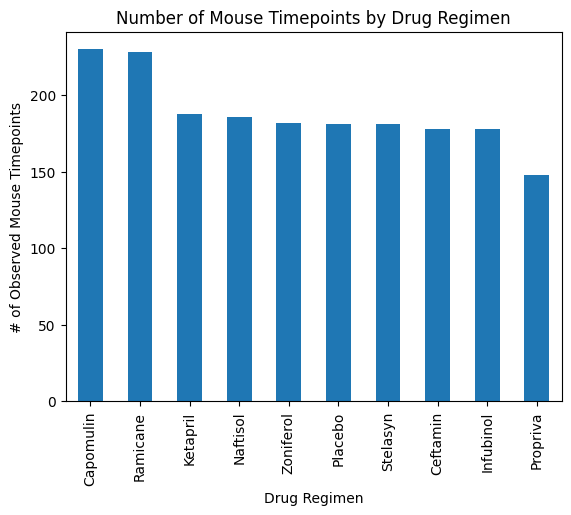

In [36]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
grouped_drug_data = clean_df.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending=False)
grouped_drug_data.plot(kind="bar", title="Number of Mouse Timepoints by Drug Regimen", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints");

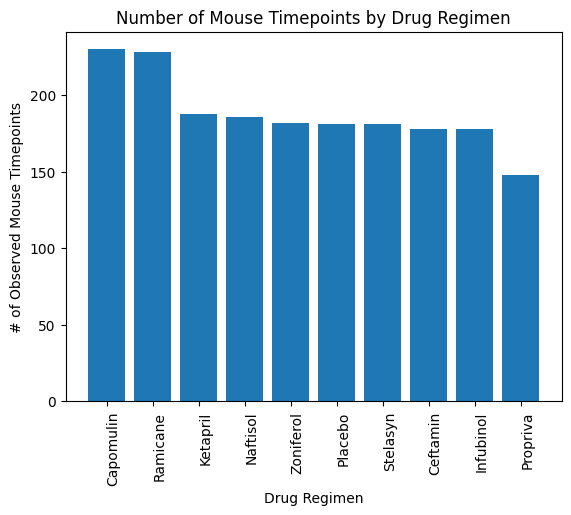

In [37]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = [x for x in range(len(pd.unique(clean_df["Drug Regimen"])))]

plt.bar(x_axis, list(grouped_drug_data))
plt.xticks(x_axis, grouped_drug_data.index, rotation=90, rotation_mode="anchor", ha="right", wrap=True);
plt.title("Number of Mouse Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen");
plt.ylabel("# of Observed Mouse Timepoints");
plt.show()

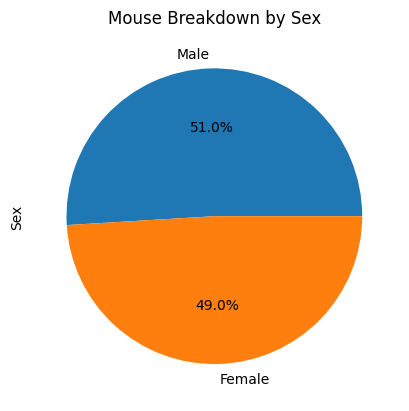

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
grouped_sex_data = clean_df.groupby(["Sex"])["Timepoint"].count().sort_values(ascending=False)
grouped_sex_data.plot(kind="pie", title="Mouse Breakdown by Sex", ylabel="Sex", autopct="%1.1f%%");

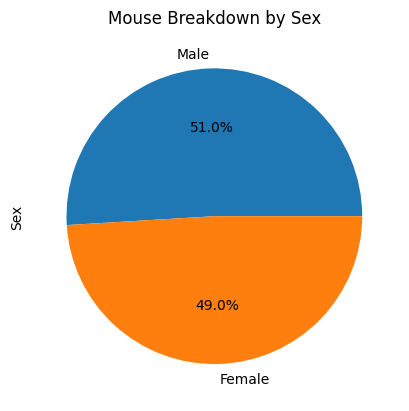

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(grouped_sex_data, labels=list(grouped_sex_data.index), autopct="%1.1f%%")
plt.title("Mouse Breakdown by Sex")
plt.ylabel("Sex");
plt.show()

## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = pd.DataFrame(clean_df.groupby(["Mouse ID"])["Timepoint"].max())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_merged_df = pd.merge(clean_df, last_timepoints, on=["Mouse ID", "Timepoint"])

In [41]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
volume_data = []

for drug in treatments:
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = new_merged_df.loc[new_merged_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_volumes = new_merged_df.loc[new_merged_df["Drug Regimen"] == drug]
    
    # add subset 
    volume_data.append(final_volumes["Tumor Volume (mm3)"])
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = [v for v in volume_data[treatments.index(drug)] if ((v < lower_bound) or (v > upper_bound))]
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


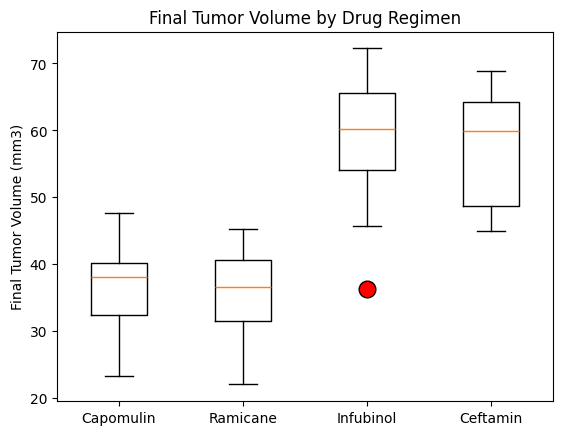

In [42]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# flierprops parameter taken from StackOverflow: https://stackoverflow.com/questions/65648502/how-to-change-outlier-point-symbol-in-python-matplotlib-pyplot
plt.boxplot(volume_data, labels=treatments, flierprops={"markersize": 12, "markerfacecolor":"red"});
plt.title("Final Tumor Volume by Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

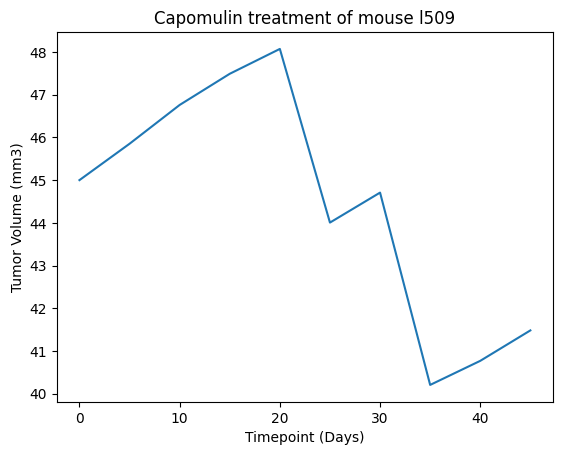

In [43]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_data = clean_df.loc[clean_df["Mouse ID"] == "l509"]
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])
plt.title(f"{mouse_data.iloc[0, 4]} treatment of mouse {mouse_data.iloc[0, 0]}")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

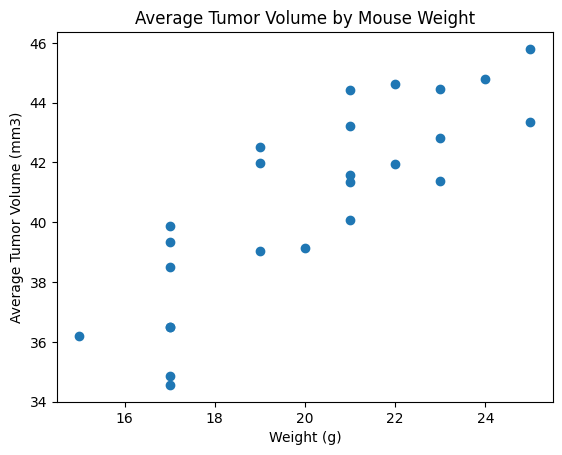

In [44]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"].groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()
x_axis = pd.Series([capomulin_data.index[x][1] for x in range(len(capomulin_data))])
y_axis = pd.Series([capomulin_data.iloc[x] for x in range(len(capomulin_data))])
plt.scatter(x_axis, y_axis);
plt.title("Average Tumor Volume by Mouse Weight")
plt.xlabel("Weight (g)");
plt.ylabel("Average Tumor Volume (mm3)");
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


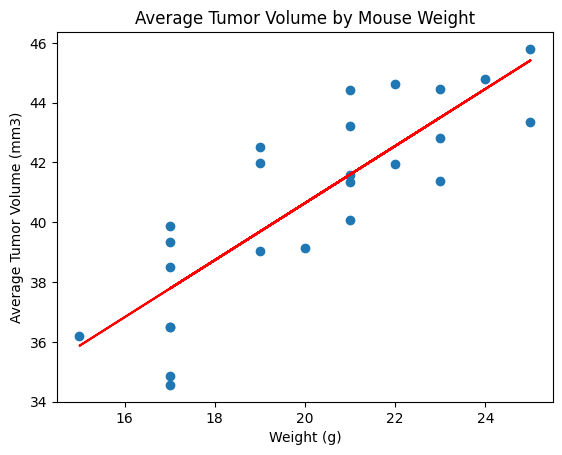

In [45]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr_coeff = round(st.pearsonr(x_axis, y_axis).correlation, 2)
print(f"The correlation between mouse weight and the average tumor volume is {corr_coeff}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.scatter(x_axis ,y_axis)
plt.plot(x_axis, regress_values, "-", color="red")
plt.title("Average Tumor Volume by Mouse Weight")
plt.xlabel("Weight (g)");
plt.ylabel("Average Tumor Volume (mm3)");
plt.show()